In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##DATA CHECK


In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**NO NULL VALUES**


In [8]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:

df.duplicated().sum()

0

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
print("Categories in 'gender' column: ",end="")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' column: ",end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' column: ",end="")
print(df['parental level of education'].unique())

print("Categories in 'lunch ' column: ",end="")
print(df['lunch'].unique())

print("Categories in test preparation course' column: ",end="")
print(df['test preparation course'].unique())

Categories in 'gender' column: ['female' 'male']
Categories in 'race/ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch ' column: ['standard' 'free/reduced']
Categories in test preparation course' column: ['none' 'completed']


In [12]:
numrical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

categorical_features = [feature for feature in df.columns if feature not in numrical_features]
print("Numerical Features: ",numrical_features)
print("\nCategorical Features: ",categorical_features)

Numerical Features:  ['math score', 'reading score', 'writing score']

Categorical Features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()
print(f'Number of students who got full marks in reading: {reading_full}')
print(f'Number of students who got full marks in writing: {writing_full}')
print(f'Number of students who got full marks in math: {math_full}')



Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14
Number of students who got full marks in math: 7


In [15]:
reading_less= df[df['reading score'] < 20]['average_score'].count()
writing_less = df[df['writing score'] < 20]['average_score'].count()
math_less = df[df['math score'] < 20]['average_score'].count()
print(f'Number of students who got less than 20 marks in reading: {reading_less}')
print(f'Number of students who got less than 20 marks in writing: {writing_less}')
print(f'Number of students who got less than 20 marks in math: {math_less}')


Number of students who got less than 20 marks in reading: 1
Number of students who got less than 20 marks in writing: 3
Number of students who got less than 20 marks in math: 4


*VISUALISATION*

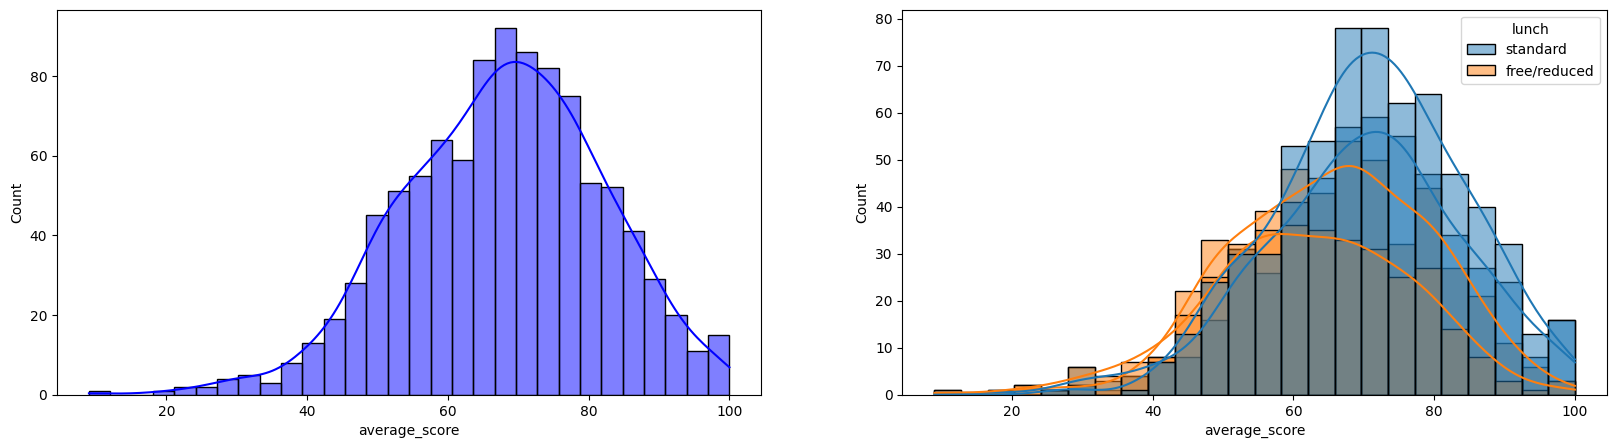

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(121)
sns.histplot(data=df, x='average_score',bins=30, kde=True, color='blue')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True,hue='gender', color='red')

sns.histplot(data=df, x='average_score', kde=True,hue='lunch', color='red')
plt.show()



**female perform well**